In [1]:
import splitfolders
splitfolders.ratio(r"D:\ZSL\devise-Awa2-october-2022\primary_dataset_1_20th_may", 
                   'split_data', 
                   seed=1111, 
                   ratio=(0.7, 0.15, 0.15))

In [2]:
import tensorflow as tf
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Flatten,Dropout
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from typing import List, Tuple, Dict
import sklearn.metrics.pairwise as skpairwise
import pandas as pd
import glob
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization

In [3]:
from tensorflow import keras
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, 
                                                       horizontal_flip=True, 
                                                       vertical_flip=True)

In [4]:
train_data = datagen.flow_from_directory('split_data/train', target_size=(224,224), 
                                         batch_size=8, class_mode='categorical', shuffle=True)
valid_data = datagen.flow_from_directory('split_data/val', target_size=(224,224), 
                                         batch_size=8, class_mode='categorical', shuffle=True)
test_data = datagen.flow_from_directory('split_data/test', target_size=(224,224), 
                                        batch_size=8, class_mode='categorical', shuffle=False)

Found 9767 images belonging to 2 classes.
Found 2093 images belonging to 2 classes.
Found 2095 images belonging to 2 classes.


In [5]:
#basic CNN model - layers increased - accuracy - 90 - Model 2- Trail for main model
# training accuracy = 48%
# validation accuracy= 45%

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(224,224,3)))
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
model.add(keras.layers.Conv2D(8, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 16)     6

In [6]:
optim = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
batch_size = 64

In [6]:
history = model.fit(train_data, validation_data=valid_data, batch_size=64, epochs=250)

Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
358/358 [==============================] - ETA: 0s - loss: 2.3748 - accuracy: 0.1917WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001B4274C8AF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

Epoch 44/250
358/358 [==============================] - 21s 57ms/step - loss: 1.2869 - accuracy: 0.5552 - val_loss: 1.2229 - val_accuracy: 0.5899
Epoch 45/250
358/358 [==============================] - 21s 57ms/step - loss: 1.2928 - accuracy: 0.5503 - val_loss: 1.2755 - val_accuracy: 0.5449
Epoch 46/250
358/358 [==============================] - 21s 58ms/step - loss: 1.2827 - accuracy: 0.5520 - val_loss: 1.3192 - val_accuracy: 0.5421
Epoch 47/250
358/358 [==============================] - 20s 57ms/step - loss: 1.2668 - accuracy: 0.5531 - val_loss: 1.4799 - val_accuracy: 0.5309
Epoch 48/250
358/358 [==============================] - 21s 57ms/step - loss: 1.2542 - accuracy: 0.5698 - val_loss: 1.3998 - val_accuracy: 0.5758
Epoch 49/250
358/358 [==============================] - 20s 57ms/step - loss: 1.2810 - accuracy: 0.5541 - val_loss: 1.2684 - val_accuracy: 0.5562
Epoch 50/250
358/358 [==============================] - 21s 59ms/step - loss: 1.2397 - accuracy: 0.5723 - val_loss: 1.5087 -

Epoch 156/250
358/358 [==============================] - 21s 58ms/step - loss: 0.7814 - accuracy: 0.7406 - val_loss: 1.3112 - val_accuracy: 0.6320
Epoch 157/250
358/358 [==============================] - 20s 57ms/step - loss: 0.7766 - accuracy: 0.7311 - val_loss: 1.3372 - val_accuracy: 0.6152
Epoch 158/250
358/358 [==============================] - 21s 58ms/step - loss: 0.7830 - accuracy: 0.7346 - val_loss: 1.2590 - val_accuracy: 0.6096
Epoch 159/250
358/358 [==============================] - 21s 57ms/step - loss: 0.7628 - accuracy: 0.7427 - val_loss: 1.3232 - val_accuracy: 0.6236
Epoch 160/250
358/358 [==============================] - 21s 58ms/step - loss: 0.7737 - accuracy: 0.7374 - val_loss: 1.2937 - val_accuracy: 0.6236
Epoch 161/250
358/358 [==============================] - 21s 57ms/step - loss: 0.7923 - accuracy: 0.7284 - val_loss: 1.1721 - val_accuracy: 0.6376
Epoch 162/250
358/358 [==============================] - 21s 58ms/step - loss: 0.7806 - accuracy: 0.7360 - val_loss: 1

Epoch 212/250
358/358 [==============================] - 21s 58ms/step - loss: 0.6764 - accuracy: 0.7797 - val_loss: 1.4440 - val_accuracy: 0.5899
Epoch 213/250
358/358 [==============================] - 21s 57ms/step - loss: 0.6703 - accuracy: 0.7741 - val_loss: 1.1700 - val_accuracy: 0.6517
Epoch 214/250
358/358 [==============================] - 21s 58ms/step - loss: 0.7031 - accuracy: 0.7584 - val_loss: 1.1919 - val_accuracy: 0.6404
Epoch 215/250
358/358 [==============================] - 21s 58ms/step - loss: 0.6936 - accuracy: 0.7696 - val_loss: 1.0894 - val_accuracy: 0.6742
Epoch 216/250
358/358 [==============================] - 21s 58ms/step - loss: 0.6920 - accuracy: 0.7696 - val_loss: 1.4088 - val_accuracy: 0.6067
Epoch 217/250
358/358 [==============================] - 22s 60ms/step - loss: 0.6649 - accuracy: 0.7744 - val_loss: 1.0526 - val_accuracy: 0.6882
Epoch 218/250
358/358 [==============================] - 21s 59ms/step - loss: 0.7151 - accuracy: 0.7689 - val_loss: 1

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks_list = [early_stop]

In [8]:
import time

In [9]:
t0 = time.time()

history = model.fit(train_data, 
                    epochs=100, batch_size=64, 
                    validation_data=(valid_data), 
                    verbose=1, callbacks=callbacks_list)

print("Training time:", time.time()-t0)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1221/1221 [==============================] - ETA: 0s - loss: 0.7174 - accuracy: 0.6324WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000223C48F0E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=

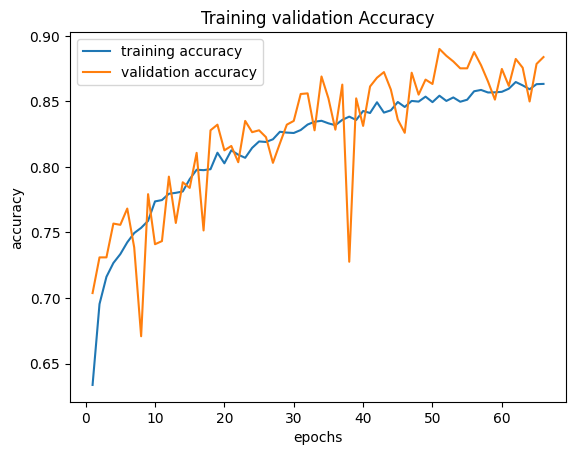

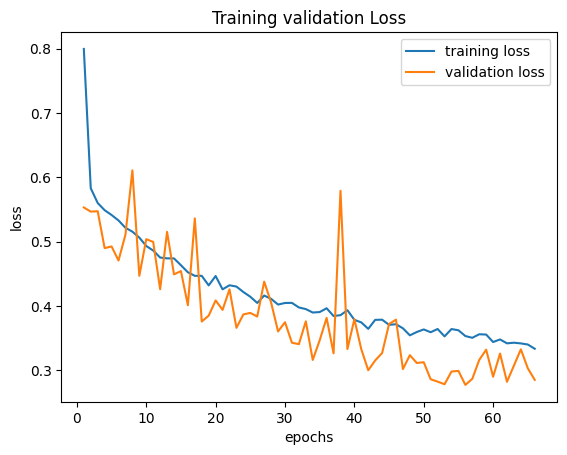

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation Loss')
plt.show()

In [1]:
model.evaluate(test_data)

NameError: name 'model' is not defined

In [17]:
model.save('21_may_2_model.h5')

In [12]:
model.save('Trail_3_Main_20_may_model.h5')

In [14]:
model.save('Trail_2_Main_20_may_model.h5')

In [10]:
model.save('Trail_1_Main_20_may_model.h5')

In [17]:
model.save('Main_20_may_model.h5')

In [29]:
model.save('20_may_1_model.h5')

In [17]:
model.save('20_may_2_model.h5')

In [3]:
model = tf.keras.models.load_model('Trail_1_Main_20_may_model.h5')

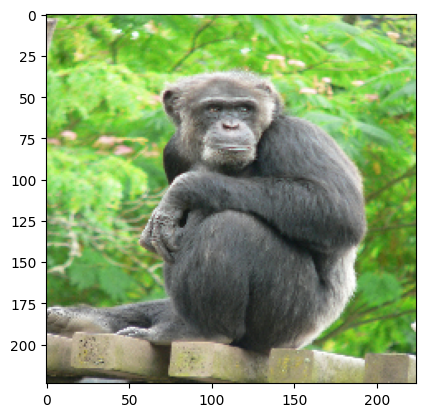

In [32]:
import cv2
img = cv2.imread(r"D:\ZSL\devise-Awa2-october-2022\Test classes\chimpanzee\chimpanzee_10027.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img/255.0
plt.imshow(img)

In [33]:
img.shape

(224, 224, 3)

In [34]:
input_img = img.reshape(1,224,224,3)
input_img.shape

(1, 224, 224, 3)

In [35]:
output = model.predict(input_img)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 709ms/step


In [36]:
output

array([[0.91611725, 0.08388274]], dtype=float32)

In [37]:

out = np.argmax(output)
out

0

In [27]:
print(counter_cat)

537


In [28]:
print(counter_hippo_leopard)

0


In [29]:
print(counter_humpback)

15


In [25]:
print(counter_rat_raccoon)

255


In [39]:
print(counter_pig)

204


In [37]:
print(counter_panda)

490


In [13]:
print(counter_seal)

201


In [17]:
print(counter_chimp)

375


1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 19ms/step


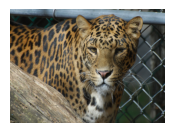

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10001.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 24ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


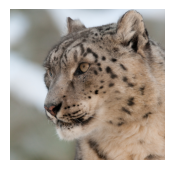

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10002.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 27ms/step


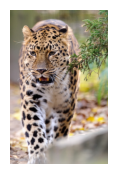

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10003.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 19ms/step


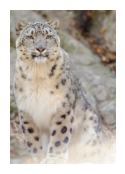

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10004.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


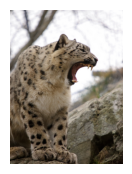

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10005.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


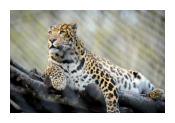

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10006.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 22ms/step


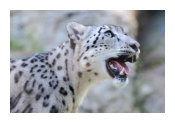

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10007.jpg
Prediction for image: tiger, bobcat, tigers, leopard, bobcats
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


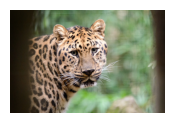

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10008.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


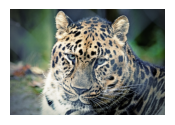

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10009.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


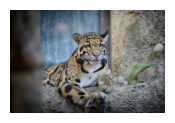

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10010.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


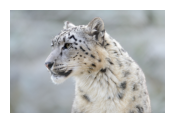

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10011.jpg
Prediction for image: bobcat, tiger, tigers, bobcats, leopard
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


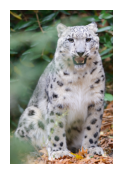

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10012.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, raccoon
1/1 [==============================] - 0s 18ms/step
result is = 1
1/1 [==============================] - 0s 19ms/step


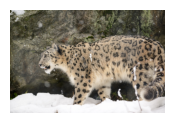

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10013.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


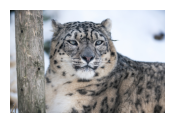

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10014.jpg
Prediction for image: bobcat, bobcats, Bobcat, tiger, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


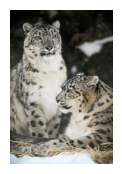

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10015.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


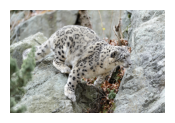

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10016.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


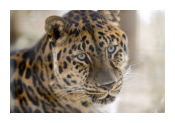

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10017.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 22ms/step


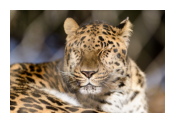

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10018.jpg
Prediction for image: tiger, tigers, bobcat, leopard, tigress
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


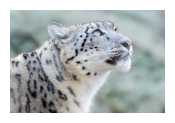

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10019.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


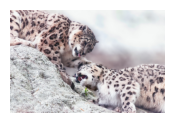

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10020.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


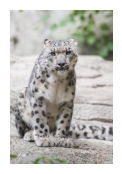

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10021.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


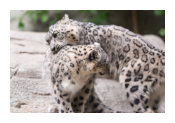

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10022.jpg
Prediction for image: bobcat, tiger, bobcats, puma, cougar
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


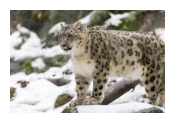

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10023.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, raccoon
1/1 [==============================] - 0s 11ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


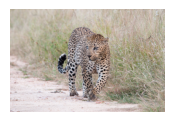

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10024.jpg
Prediction for image: bobcat, bobcats, tiger, Bobcat, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 7ms/step


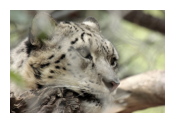

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10025.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 4ms/step


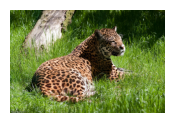

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10026.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 11ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


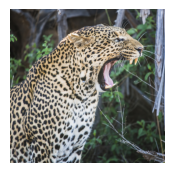

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10027.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, coyote
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


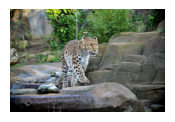

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10028.jpg
Prediction for image: bobcat, bobcats, tiger, Bobcat, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 6ms/step


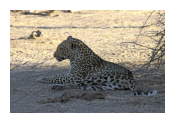

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10029.jpg
Prediction for image: bobcat, tiger, tigers, bobcats, leopard
1/1 [==============================] - 0s 11ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


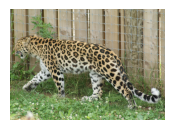

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10030.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


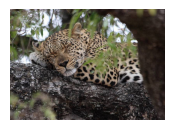

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10031.jpg
Prediction for image: bobcat, bobcats, tiger, Bobcat, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 9ms/step


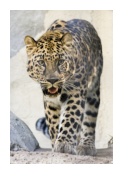

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10032.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


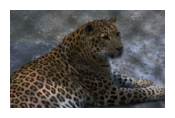

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10033.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 7ms/step


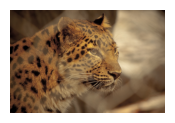

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10034.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tiger-striped
1/1 [==============================] - 0s 27ms/step
result is = 1
1/1 [==============================] - 0s 6ms/step


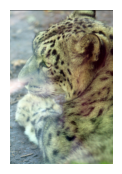

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10035.jpg
Prediction for image: bobcat, tiger, bobcats, tigers, leopard
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


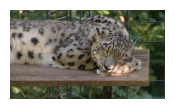

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10036.jpg
Prediction for image: bobcat, tiger, bobcats, puma, cougar
1/1 [==============================] - 0s 19ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


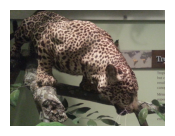

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10037.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, raccoon
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


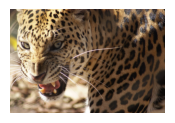

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10038.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 5ms/step


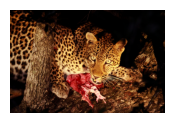

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10039.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


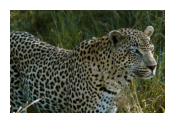

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10040.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, coyote
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 12ms/step


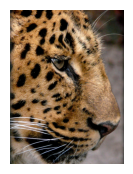

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10041.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


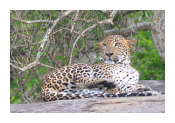

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10042.jpg
Prediction for image: tiger, tigers, tigress, leopard, bobcat
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


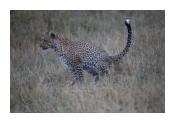

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10043.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


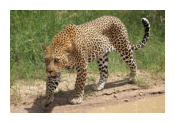

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10044.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


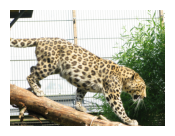

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10045.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, raccoon
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


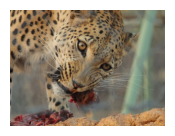

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10046.jpg
Prediction for image: bobcat, bobcats, tiger, Bobcat, cougar
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 21ms/step


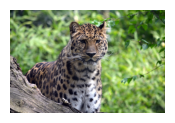

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10047.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


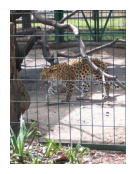

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10048.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


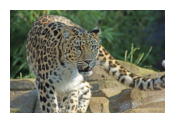

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10049.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tiger-striped
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


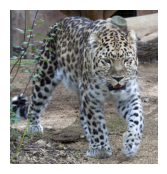

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10050.jpg
Prediction for image: bobcat, tiger, tigers, bobcats, leopard
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


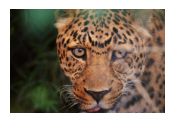

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10051.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 11ms/step
result is = 1
1/1 [==============================] - 0s 4ms/step


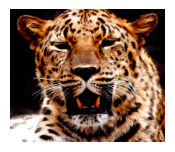

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10052.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


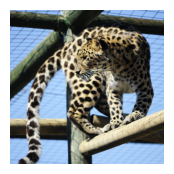

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10053.jpg
Prediction for image: bobcat, bobcats, tiger, Bobcat, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 4ms/step


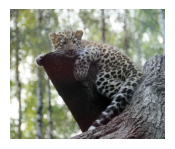

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10054.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, raccoon
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


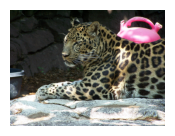

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10055.jpg
Prediction for image: bobcat, tiger, bobcats, tigers, puma
1/1 [==============================] - 0s 17ms/step
result is = 1
1/1 [==============================] - 0s 12ms/step


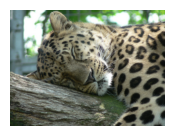

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10056.jpg
Prediction for image: tiger, tigers, tigress, leopard, bobcat
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 12ms/step


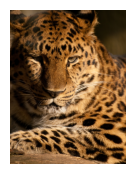

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10057.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 21ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


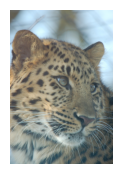

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10058.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 12ms/step


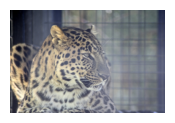

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10059.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


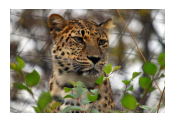

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10060.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 6ms/step


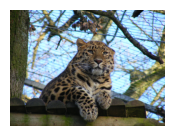

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10061.jpg
Prediction for image: bobcat, tiger, bobcats, puma, cougar
1/1 [==============================] - 0s 17ms/step
result is = 1
1/1 [==============================] - 0s 6ms/step


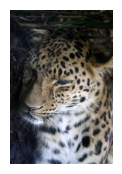

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10062.jpg
Prediction for image: tiger, tigers, bobcat, leopard, tigress
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 15ms/step


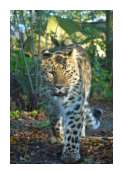

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10063.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 6ms/step


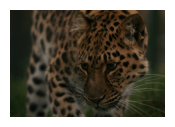

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10064.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


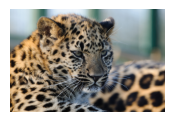

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10065.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


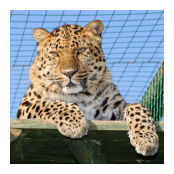

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10066.jpg
Prediction for image: bobcat, bobcats, tiger, Bobcat, cougar
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


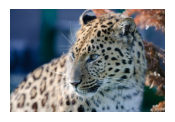

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10067.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


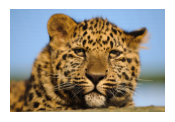

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10068.jpg
Prediction for image: tiger, tigers, bobcat, leopard, tigress
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


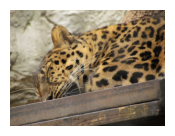

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10069.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 18ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


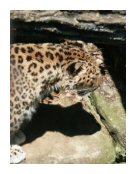

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10070.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, raccoon
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 6ms/step


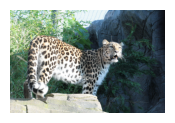

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10071.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


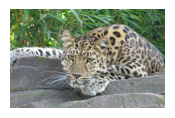

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10072.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 0
1/1 [==============================] - 0s 12ms/step


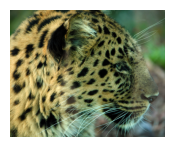

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10073.jpg
Prediction for image: cow, cows, pig, goat, milker
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


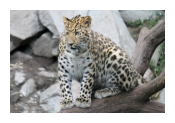

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10074.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 18ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


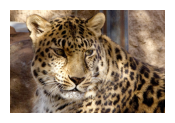

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10075.jpg
Prediction for image: tiger, tigers, lion, tigress, leopard
1/1 [==============================] - 0s 11ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


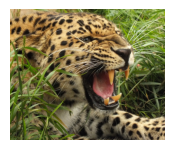

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10076.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


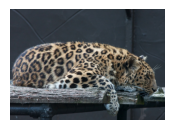

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10077.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


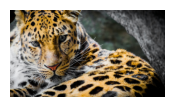

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10078.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 13ms/step


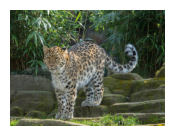

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10079.jpg
Prediction for image: bobcat, bobcats, tiger, cougar, puma
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


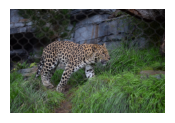

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10080.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, tiger
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 5ms/step


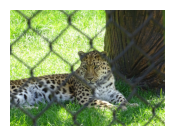

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10081.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, coyote
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 20ms/step


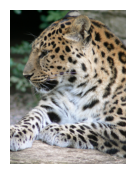

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10082.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


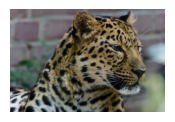

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10083.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


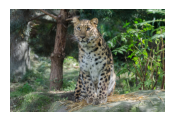

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10084.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 8ms/step


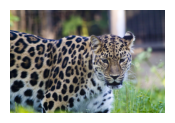

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10085.jpg
Prediction for image: bobcat, tiger, bobcats, puma, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


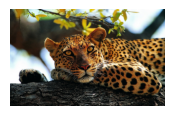

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10086.jpg
Prediction for image: bobcat, tiger, tigers, bobcats, leopard
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 20ms/step


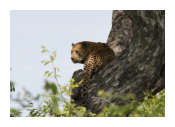

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10087.jpg
Prediction for image: bobcat, bobcats, squirrel, raccoon, coyote
1/1 [==============================] - 0s 11ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


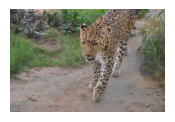

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10088.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, coyote
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 7ms/step


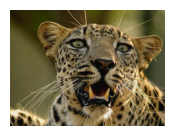

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10089.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 27ms/step
result is = 1
1/1 [==============================] - 0s 11ms/step


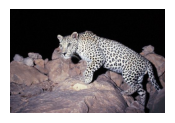

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10090.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


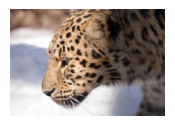

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10091.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, coyote
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


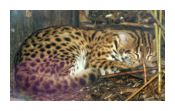

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10092.jpg
Prediction for image: bobcat, bobcats, Bobcat, cougar, coyote
1/1 [==============================] - 0s 27ms/step
result is = 1
1/1 [==============================] - 0s 7ms/step


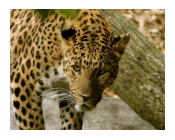

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10093.jpg
Prediction for image: tiger, tigers, bobcat, leopard, tigress
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 9ms/step


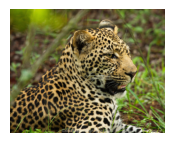

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10094.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 29ms/step
result is = 1
1/1 [==============================] - 0s 18ms/step


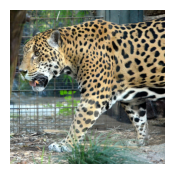

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10095.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


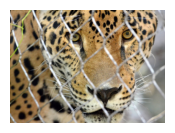

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10096.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 9ms/step


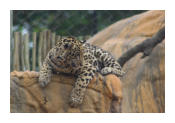

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10097.jpg
Prediction for image: tiger, bobcat, tigers, leopard, bobcats
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 14ms/step


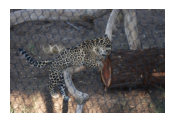

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10098.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 4ms/step


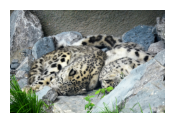

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10099.jpg
Prediction for image: tiger, tigers, tigress, lion, leopard
1/1 [==============================] - 0s 13ms/step
result is = 1
1/1 [==============================] - 0s 12ms/step


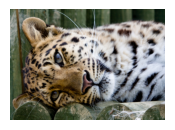

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10100.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


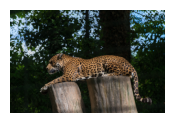

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10101.jpg
Prediction for image: tiger, bobcat, tigers, leopard, tigress
1/1 [==============================] - 0s 15ms/step
result is = 1
1/1 [==============================] - 0s 20ms/step


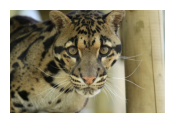

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10102.jpg
Prediction for image: tiger, tigers, tigress, leopard, lion
1/1 [==============================] - 0s 12ms/step
result is = 1
1/1 [==============================] - 0s 5ms/step


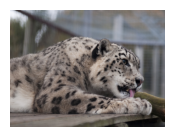

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10103.jpg
Prediction for image: bobcat, bobcats, tiger, cougar, puma
1/1 [==============================] - 0s 14ms/step
result is = 1
1/1 [==============================] - 0s 17ms/step


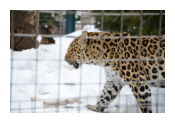

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10104.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
1/1 [==============================] - 0s 16ms/step
result is = 1
1/1 [==============================] - 0s 16ms/step


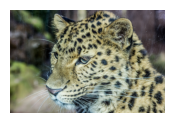

foler D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\chimpanzee\leopard_10105.jpg
Prediction for image: bobcat, bobcats, Bobcat, coyote, cougar
Testing time: 31.139491081237793


In [18]:
#Final classification 


import time
t0 = time.time()
save_pred = {}
Main_counter_1=0
Main_counter_2=0
count_1=0
count_2=0
count_3=0
count_4=0
count_5=0
counter_hippo_leopard=0
counter_cat=0
counter_humpback=0
counter_seal=0
counter_chimp=0
counter_pig=0
counter_panda=0
counter_rat_raccoon=0


for img_path in glob.glob(r"D:\ZSL\CNN\Test_TRIAL_DATASET_1-CLASS_1\*\*"):




    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = img/255.0
    #plt.imshow(img)
    input_img = img.reshape(1,224,224,3)
    output = model.predict(input_img)
    out = np.argmax(output)
    print('result is =',out)
    if out == 0:
                    
            img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
            img_path))

            # get prediction vector
            prediction: np.ndarray = model_1_ZSL.predict(np.expand_dims(
                tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
                img, (224, 224))), axis=0))

            # get top-n labels by cosine similarity
            most_similar: List[str] = fast_text_vectors.similar_by_vector(
            prediction[0], topn=5)
        
    
            for i in most_similar:
                if i[0] == 'bear':
            
                    counter_panda+=1
                
            for i in most_similar:
               # if i[0] == img_path.split("\\")[-2]:
                if i[0] == 'chimp':
                    counter_chimp+=1
            
            for i in most_similar:
                if i[0] == img_path.split("\\")[-2]:
                    counter_pig+=1
            
                    

            # display image
            plt.figure(figsize=(2,2))
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # print the predictions for image
            save_pred[img_path] = [x[0] for x in most_similar]
            print("foler",img_path)
            print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")
            count_1+=1
            
          
                
            
                               

    else:       
    
    
            img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
            img_path))

            # get prediction vector
            prediction: np.ndarray = model_2_ZSL.predict(np.expand_dims(
                tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
                img, (224, 224))), axis=0))

            # get top-n labels by cosine similarity
            most_similar: List[str] = fast_text_vectors.similar_by_vector(
            prediction[0], topn=5)
        
    
            for i in most_similar:
                if i[0] == img_path.split("\\")[-2]:
           
                    counter_hippo_leopard+=1
            
            for i in most_similar:
                if i[0] == 'sealskin':
            #  if i[0] == 'dog':
                    counter_seal+=1
                
            for i in most_similar:
               # if i[0] == img_path.split("\\")[-2]:
                if i[0] == 'humpback':
                    counter_humpback+=1
                
            for i in most_similar:
                if i[0] == img_path.split("\\")[-2]:
                    counter_rat_raccoon+=1
            
            for i in most_similar:
                if i[0] == 'cat':
                    counter_cat+=1
            
                    

            # display image
            plt.figure(figsize=(2,2))
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # print the predictions for image
            save_pred[img_path] = [x[0] for x in most_similar]
            print("foler",img_path)
            print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")
            count_2+=1
            
print("Testing time:", time.time()-t0)    
        

In [22]:
print(counter_cat)

0


In [59]:
print(counter_rat_raccoon)

227


In [60]:
print(counter_seal)

6


In [42]:
print(counter_chimp)

294


In [44]:
print(counter_panda)

424


In [57]:
print(counter_pig)

200


In [52]:
counter_hippo_leopard

284

In [40]:
counter_humpback

697

In [35]:
count_1

170

In [36]:
count_2

514

In [3]:
batch_size = 4
img_height = 224
img_width = 224

In [4]:
train_data=tf.keras.utils.image_dataset_from_directory(r"D:\ZSL\devise-Awa2-october-2022\ZSL_class_21_may\class_1",labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(r"D:\ZSL\devise-Awa2-october-2022\ZSL_class_21_may\class_1",labels="inferred",
  label_mode="int",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4097 files belonging to 5 classes.
Using 3278 files for training.
Found 4097 files belonging to 5 classes.
Using 819 files for validation.


In [6]:
lenth_train_data = len(train_data.file_paths)
lenth_val_data = len(val_ds.file_paths)
lenth_train_data,  lenth_val_data

(6408, 1601)

In [7]:
class_names = train_data.class_names
print(class_names)

['blue_whale', 'bobcat', 'dolphin', 'killer_whale', 'lion', 'mouse', 'rabbit', 'rhinoceros', 'siamese+cat', 'skunk', 'squirrel', 'tiger', 'walrus']


In [8]:
x_l=[]
y_l = []
for x,y in train_data:
  x_l.append(x)
  y_l.append(y)
x_train=np.concatenate(x_l,axis=0)
y_train =np.concatenate(y_l,axis=0)


In [9]:
x_l=[]
y_l = []
for x,y in val_ds:
  x_l.append(x)
  y_l.append(y)
val_dat=np.concatenate(x_l,axis=0)
y_test =np.concatenate(y_l,axis=0)

In [10]:
fine_labels: List[str] = class_names
fine_labels

['blue_whale',
 'bobcat',
 'dolphin',
 'killer_whale',
 'lion',
 'mouse',
 'rabbit',
 'rhinoceros',
 'siamese+cat',
 'skunk',
 'squirrel',
 'tiger',
 'walrus']

In [11]:
y_train = np.reshape(y_train,(lenth_train_data,1))
y_test = np.reshape(y_test,(lenth_val_data,1))

In [12]:
y_train_str: np.ndarray = np.array(list(map(lambda x: np.array(
    [fine_labels[x[0]]]), y_train)))
y_test_str: np.ndarray = np.array(list(map(lambda x: np.array(
    [fine_labels[x[0]]]), y_test)))

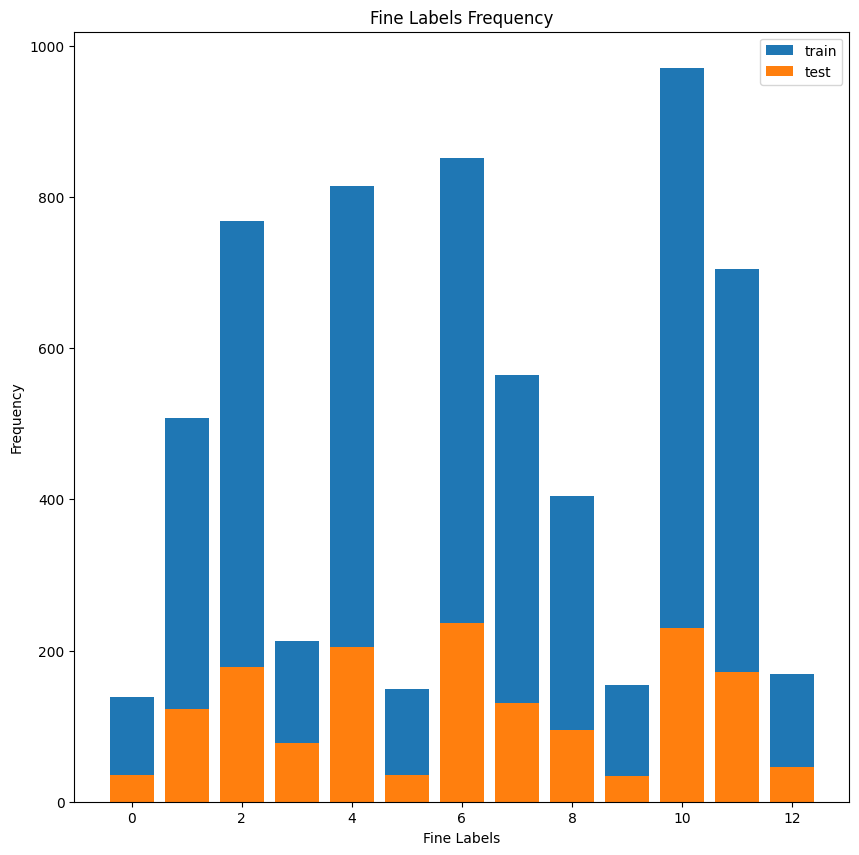

In [13]:
unique: np.ndarray = None
counts: int = 0

plt.figure(figsize=(10, 10))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, label='train')
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts, label='test')

plt.title('Fine Labels Frequency')
plt.xlabel('Fine Labels')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [14]:
fast_text_vectors: gs.models.keyedvectors = gdownloader.load(
     "fasttext-wiki-news-subwords-300")

NameError: name 'gdownloader' is not defined

In [4]:
from gensim.models.keyedvectors import KeyedVectors
# fast_text_vectors.save('fstwk.d2v')
fast_text_vectors = KeyedVectors.load("fstwk.d2v")

In [25]:
fine_labels_words: List[List[str]] = list(
    map(tf.keras.preprocessing.text.text_to_word_sequence, fine_labels))

word_list: List[str] = None
for word_list in fine_labels_words:
    print(word_list)

['blue', 'whale']
['bobcat']
['dolphin']
['killer', 'whale']
['lion']
['mouse']
['rabbit']
['rhinoceros']
['siamese', 'cat']
['skunk']
['squirrel']
['tiger']
['walrus']


In [26]:
word_list: List[str] = None
word: str = ''
for word_list in fine_labels_words:
    for word in word_list:
        try:
            fast_text_vectors.word_vec(word)
        except Exception as err:
            print(f"-----{word} isn't in corpus----")

C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  


In [27]:
def word_list_to_avg_vector(lst: List[str]) -> np.ndarray:
    """
    Transform a word list to its average vector
    Parameters:
        lst (List[str]): string to transform to vector
    Returns:
        np.ndarray: vector representation of word list
    """
    # create empty array
    vec: np.ndarray = np.array([0.0] * 300)

    word: str = ''
    for word in lst:
        # add word vector to sentence vectors or zero if no word vector
        vec += fast_text_vectors.word_vec(word)

    # return average vector (take sentence length into consideration)
    return vec / len(lst)


fine_labels_vecs = np.asarray(list(
    map(word_list_to_avg_vector, fine_labels_words)))

print(f"fine labels vectors shape: {fine_labels_vecs.shape}")

fine labels vectors shape: (13, 300)


C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  from ipykernel import kernelapp as app


In [28]:
# calculate cosine similarity between each two labels
similarity_matrix: np.ndarray = skpairwise.cosine_similarity(
    fine_labels_vecs, fine_labels_vecs)

# get only lower triangle
similarity_matrix: np.ndarray = np.tril(similarity_matrix, -1)

# get indexes with cosine similarity greater than 0.65
indexes: np.ndarray = np.argwhere(similarity_matrix > 0.5)

# create dataframe for better printing
fine_labels_high_similarity: pd.DataFrame = pd.DataFrame(
    {'Fine Label 1': [fine_labels[i[0]] for i in indexes],
     'Fine Label 2':  [fine_labels[i[1]] for i in indexes],
     'cosine similarity': [similarity_matrix[i[0], i[1]] for i in indexes]
     }
)

print("Fine labels with high cosine"
      "similarity and the cosine similarity value:\n"
      f"{fine_labels_high_similarity}")

Fine labels with high cosinesimilarity and the cosine similarity value:
    Fine Label 1  Fine Label 2  cosine similarity
0        dolphin    blue_whale           0.679589
1   killer_whale    blue_whale           0.806770
2   killer_whale       dolphin           0.701142
3           lion    blue_whale           0.529450
4           lion       dolphin           0.524764
5           lion  killer_whale           0.517552
6         rabbit         mouse           0.607289
7     rhinoceros    blue_whale           0.506983
8     rhinoceros  killer_whale           0.518046
9     rhinoceros          lion           0.565613
10   siamese+cat        bobcat           0.563919
11   siamese+cat          lion           0.520759
12   siamese+cat         mouse           0.575225
13   siamese+cat        rabbit           0.613360
14         skunk        bobcat           0.529458
15         skunk   siamese+cat           0.510126
16      squirrel    blue_whale           0.528626
17      squirrel        bobc

In [29]:
y_train_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_train])
y_train_vecs: np.ndarray = y_train_vecs.reshape((lenth_train_data, 300))
y_test_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_test])
y_test_vecs: np.ndarray = y_test_vecs.reshape((lenth_val_data, 300))

print(f"Train fine labels vectors shape: {y_train_vecs.shape}")
print(f"Test fine labels vectors shape: {y_test_vecs.shape}")

Train fine labels vectors shape: (6408, 300)
Test fine labels vectors shape: (1601, 300)


In [30]:
x_train: np.ndarray = tf.keras.applications.vgg19.preprocess_input(x_train)
val_dat: np.ndarray = tf.keras.applications.vgg19.preprocess_input(val_dat)

In [31]:
# create base model = vgg19
#base_model: tf.keras.Model = tf.keras.applications.VGG19(
  #  weights='imagenet', include_top=False, 
   # input_shape=(224, 224, 3), pooling='max')
# freeze the base_model so it will not train

#base_model=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

base_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',
                   weights='imagenet')
# from keras.models import Model

#model2 = Model(base_model.input, base_model.layers[-2].output)
base_model.summary()
base_model.trainable = False


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [32]:


# create new model
model: tf.keras.Model = tf.keras.models.Sequential()
# add input layer
model.add(tf.keras.Input(shape=(224,224,3)))
# add augmentation layers
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
# add base model
model.add(base_model)
# add new layers to train
model.add(tf.keras.layers.Dense(448, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(384, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(300))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 448)               917952    
                                                                 
 dropout_2 (Dropout)         (None, 448)               0         
                                                                 
 dense_4 (Dense)             (None, 384)               172416    
                                                      

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.CosineSimilarity(axis=1))

In [34]:
import time

In [25]:
t0 = time.time()

es: tf.keras.callbacks.EarlyStopping = tf.keras.callbacks.EarlyStopping(
   monitor="val_loss", min_delta=0.01, patience=6, mode="min",
    restore_best_weights=True)
history: tf.keras.callbacks.History = model.fit(
    x_train, y_train_vecs, epochs=20, shuffle=True, 
    batch_size=batch_size, validation_split=0.2, callbacks=[es])

print("Training time:", time.time()-t0)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
656/656 [==============================] - ETA: 0s - loss: -0.8809WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002263B96F9D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

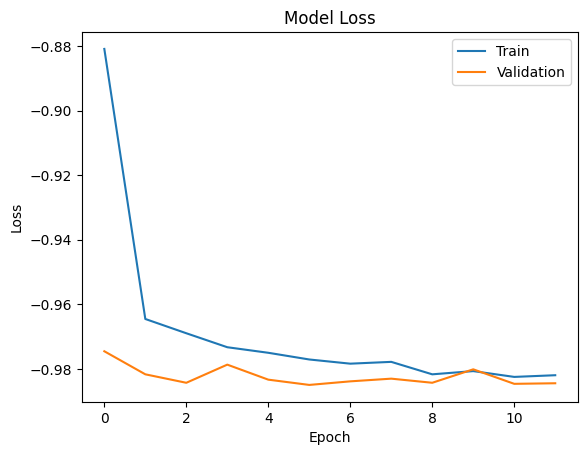

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
# batch generator for large data 

In [35]:
class My_Custom_Generator(keras.utils.Sequence) :
  
    def __init__(self, images, labels, batch_size) :
        self.images = images
        self.labels = labels
        self.batch_size = batch_size


    def __len__(self) :
        
        return (np.ceil(len(self.images) / float(self.batch_size))).astype(np.int)


    def __getitem__(self, idx) :
        
        batch_x = self.images[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array(batch_x), np.array(batch_y)

In [36]:
batch_size = 4
my_training_batch_generator = My_Custom_Generator(x_train, y_train_vecs, batch_size)
my_validation_batch_generator = My_Custom_Generator(val_dat, y_test_vecs, batch_size)

In [38]:
t0 = time.time()

es: tf.keras.callbacks.EarlyStopping = tf.keras.callbacks.EarlyStopping(
   monitor="val_loss", min_delta=0.01, patience=6, mode="min",
    restore_best_weights=True)
history: tf.keras.callbacks.History = model.fit(
    my_training_batch_generator, epochs=50, shuffle=True, 
    validation_data = my_validation_batch_generator,steps_per_epoch = int(3800 // batch_size),batch_size=batch_size,validation_steps = int(950 // batch_size), callbacks=[es])
print("Training time:", time.time()-t0)

C:\Users\91932\miniconda3\envs\zero_short_learning_gpu\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
950/950 [==============================] - ETA: 0s - loss: -0.8340WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000024F89170AF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

In [24]:
model.save('22_may_main_class_1_ZSL_model.h5')

In [28]:
model.save('22_may_main_class_2_ZSL_model.h5')

In [28]:
model.save('21_may_main_class_2_ZSL_model.h5')

In [27]:
model.save('21_may_main_class_1_ZSL_model.h5')

In [187]:
model.save('Train_20_may_class_3_ZSL_model.h5')

In [30]:
model.save('Train_20_may_class_5_ZSL_model.h5')

In [25]:
model.save('Trail_Train_17_may_class_1_ZSL_model.h5')

In [48]:
model.save('Train_17_may_class_5_ZSL_model.h5')

In [25]:
model.save('Train_17_may_class_2_ZSL_model.h5')

In [34]:
model.save('Train_17_may_class_1_ZSL_model.h5')

In [ ]:
model.save('Train_17_may_class_3_ZSL_model.h5')

In [28]:
model.save('Train_17_may_class_4_ZSL_model.h5')

In [5]:
model_1_ZSL = tf.keras.models.load_model('21_may_main_class_1_ZSL_model.h5')

In [6]:
model_2_ZSL = tf.keras.models.load_model('21_may_main_class_2_ZSL_model.h5')

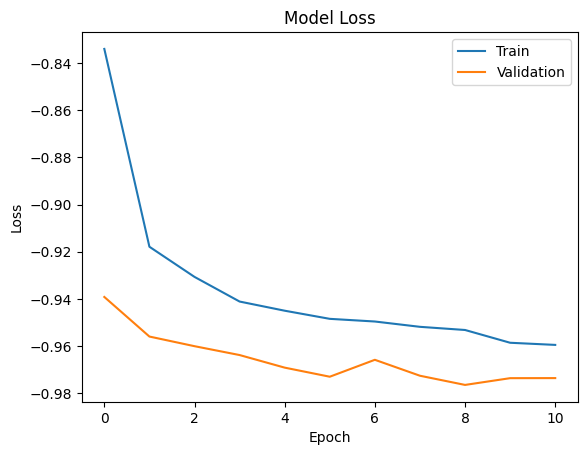

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [276]:
model_eval: float = model.evaluate(val_dat, y_test_vecs) 
print(f"Model loss {model_eval}")

3/3 [==============================] - 3s 332ms/step - loss: -0.9974
Model loss -0.9973796606063843
